# ECON-240A, Problem Set 1
## Preston Mui

### Section 1: The Binomial Distribution

#### 1 Derive a formula that can be used to calculate the ex ante probability of $Z_N < z$ for any $z \in \{1, 2, \cdots, N\}$:

\begin{align}
    P(Z_N < z) &= \sum_{k=0}^{z-1} Binomial(n,k) \theta^k (1-\theta)^{N - k}
\end{align}

Where $Binomial$ refers to $N$ choose $k$, because LaTex's binomial is not rendering in this version of Jupyter. For any given $k \in 0, 1, \cdots, N$, $P(Z_N = k) = Binomial(n,k) \theta^k (1-\theta)^{N - k}$. Since the support of the binomial distribution is the positive integers from 0 to $N$, the cumulative distribution function of $Z_N$ is the sum of $Binomial(n,k) \theta^k (1-\theta)^{N - k}$ for $k = 0$ through $k = z$.

#### 2. Provide an expression that can be used to calculate the ex ante probability of the event $\frac{\sqrt{N}(\bar{Y}_N - \theta)}{\sqrt{\theta (1-\theta)}} < c$:

\begin{align}
    P \bigg( \frac{\sqrt{N}(\bar{Y}_N - \theta)}{\sqrt{\theta (1-\theta)}} < c \bigg) &= P \bigg( \bar{Y}_N < \theta + \frac{\sqrt{\theta (1-\theta)} c}{\sqrt{N}} \bigg) \\
    &= P \bigg( Z_N < N \theta + \sqrt{N\theta (1-\theta)} c \bigg) \\ 
    &= \sum_{k=0}^{N \theta + \sqrt{N\theta (1-\theta)} c} Binomial(n,k) \theta^k (1-\theta)^{N - k}
\end{align}

#### 3. Plot $P \bigg( \frac{\sqrt{N}(\bar{Y}_N - \theta)}{\sqrt{\theta (1-\theta)}} < c \bigg)$ as a function of $c$ for $N = 5, 10, 100, 1000$ and $\theta = 1/2$., and 4. Plot the normal cdf on top:

In [9]:
import numpy as np
import math
from scipy.special import comb

c = np.linspace(-3,3,1000)
Nvalues = [5,10,100,1000]

def binomialMeanCdf(N,theta,c):
    cdf = 0
    upperLimit = int(math.ceil(N * theta + np.sqrt(N * theta * (1-theta)) * c))
    for k in range(upperLimit):
        cdf = cdf + comb(N,k) * theta**k * (1-theta)**(N-k)
    return cdf

CDFvalues50 = np.zeros((len(Nvalues),len(c)))
for i in range(len(Nvalues)):
    for j in range(len(c)):
        CDFvalues50[i,j] = binomialMeanCdf(Nvalues[i],0.5,c[j])


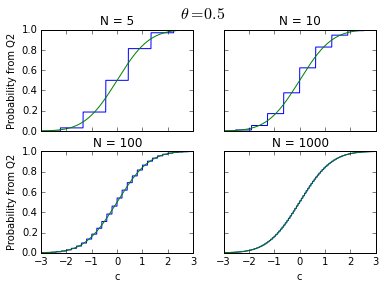

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
normCdf = norm.cdf(c)

plt.close('all')
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.set_ylabel('Probability from Q2')
ax1.plot(c,CDFvalues50[0,:])
ax1.plot(c,normCdf)
ax1.set_title('N = 5')

ax2.plot(c,CDFvalues50[1,:])
ax2.plot(c,normCdf)
ax2.set_title('N = 10')

ax3.set_xlabel('c')
ax3.set_ylabel('Probability from Q2')
ax3.plot(c,CDFvalues50[2,:])
ax3.plot(c,normCdf)
ax3.set_title('N = 100')

ax4.set_xlabel('c')
ax4.plot(c,CDFvalues50[3,:])
ax4.plot(c,normCdf)
ax4.set_title('N = 1000')

plt.suptitle(r'$\theta = 0.5$', size = 16)
plt.show()

#### 5. Repeat the above with $\theta = 1/20$:

In [17]:
CDFvalues05 = np.zeros((len(Nvalues),len(c)))
for i in range(len(Nvalues)):
    for j in range(len(c)):
        CDFvalues05[i,j] = binomialMeanCdf(Nvalues[i],0.05,c[j])
        
plt.close('all')
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')

ax1.set_ylabel('Probability from Q2')
ax1.plot(c,CDFvalues05[0,:])
ax1.plot(c,normCdf)
ax1.set_title('N = 5')

ax2.plot(c,CDFvalues05[1,:])
ax2.plot(c,normCdf)
ax2.set_title('N = 10')

ax3.set_xlabel('c')
ax3.set_ylabel('Probability from Q2')
ax3.plot(c,CDFvalues05[2,:])
ax3.plot(c,normCdf)
ax3.set_title('N = 100')

ax4.set_xlabel('c')
ax4.plot(c,CDFvalues05[3,:])
ax4.plot(c,normCdf)
ax4.set_title('N = 1000')

plt.suptitle(r'$\theta = 0.05$', size = 16)
plt.show()

NameError: name 'plt' is not defined

Comments: With both $\theta = 0.5$ and $\theta = 0.05$, the normal c.d.f is a good approximation to the binomial distribution the larger $N$ is. In particular, it seems to start being a good approximation at $N = 100$. However, for any given $N$, the normal distribution is a better approximation when $\theta = 0.5$ rather than $\theta = 0.05$.

#### 6. What is the approximate ex ante probability that the interval $\bar{Y}_N \pm \frac{\bar{Y}_N (1 - \bar{Y}_N)}{\sqrt{N}} z^{1 - \alpha / 2}$ contains the $\theta$?

The probability that the interval will contain $\theta$ is approximately $\alpha$. In the questions above I found that the distribution of $\frac{\sqrt{N}(\bar{Y}_N - \theta)}{\theta(1-\theta)}$ is approximated by the standard normal distribution; that is,
\begin{align}
    Pr\bigg(\bar{Y}_N - \theta < \sqrt{\frac{\theta (1-\theta)}{N}} z^{1-\alpha/2} \bigg) &\approx \Phi(z^{1-\alpha/2}) \\
    \implies Pr\bigg(\theta \in \bar{Y}_N \pm \sqrt{\frac{\theta (1-\theta)}{N}} z^{1-\alpha/2} \bigg) &\approx \Phi(z^{1-\alpha/2}) - \Phi(-z^{1-\alpha/2}) = \alpha
\end{align}
Since $\bar{Y}_N$ tends towards $\theta$ when $N$ is reasonable large, substituting $\bar{Y}_N$ for $\theta$ in the last expression yields $Pr\bigg(\theta \in \bar{Y}_N \pm \sqrt{\frac{\bar{Y}_N (1-\bar{Y}_N)}{N}} z^{1-\alpha/2} \bigg) \approx \alpha$.

#### 8: The Clopper Pearson proposal
The proposal will set a lower bound on the probability that the observed sample mean differs from the theoretical mean of any $\theta \in [\underline{\theta}, \bar{\theta}]$ at $1 - \alpha$. The probability that the observed mean is below the expected mean for any $\theta$ in the confidence interval is bounded by $\frac{\alpha}{2}$ because of the construction of $\bar{\theta}$. Likewise, the probability that the observed mean is above the expected mean for any $\theta$ in the confidence interval is bounded by $\frac{\alpha}{2}$ by the construction of $\underline{\theta}$.

#### 9. Argue that $F_{B}^{-1} ( \frac{\alpha}{2}; Z_N, N - Z_N + 1) < \theta < F_{B}^{-1} ( \frac{1 - \alpha}{2} ; Z_N + 1, N - Z_N)$

#### 10.

#### 11. Generate 1,000 samples of Bernoulli random variables.

In [64]:
import pandas as pd
NValues = (5,10,100,1000)
thetaValues = (0.05, 0.5)
alphaValues = (0.05, 0.10)

# Create an array to hold results
results = pd.DataFrame({"N": range(0), "theta": range(0), "alpha": range(0), "Normal Approx.": range(0), "CP": range(0), "Hoeffding": range(0)})
results = results[['N','theta','alpha','Normal Approx.', 'CP', 'Hoeffding']]
def problem6ConfidenceInterval(samples,N,alpha):
    lowerbounds = samples - np.sqrt((samples * (1 - samples)) / N) * norm.ppf(1 - alpha/2)
    upperbounds = samples + np.sqrt((samples * (1 - samples)) / N) * norm.ppf(1 - alpha/2)
    return lowerbounds, upperbounds

for N in NValues:
    for theta in thetaValues:
        # Draw 1000 samples
        sample = np.random.binomial(N,theta,size=1000) / float(N)
        for alpha in alphaValues:
            lowerbounds, upperbounds = problem6ConfidenceInterval(sample,N,alpha)
            test = (sum(theta < lowerbounds) + sum(theta > upperbounds)) / float(1000)
            results = results.append({"N": N, "theta": theta, "alpha": alpha, "Normal Approx.": test, "CP": 0, "Hoeffding": 0}, ignore_index=True)
            # Compute confidence interval from (6)
print("Fraction of samples where theta lies outside the confidence interval")
print(results)

Fraction of samples where theta lies outside the confidence interval
       N  theta  alpha  Normal Approx.  CP  Hoeffding
0      5   0.05   0.05           0.762   0          0
1      5   0.05   0.10           0.762   0          0
2      5   0.50   0.05           0.077   0          0
3      5   0.50   0.10           0.397   0          0
4     10   0.05   0.05           0.570   0          0
5     10   0.05   0.10           0.587   0          0
6     10   0.50   0.05           0.105   0          0
7     10   0.50   0.10           0.105   0          0
8    100   0.05   0.05           0.122   0          0
9    100   0.05   0.10           0.152   0          0
10   100   0.50   0.05           0.058   0          0
11   100   0.50   0.10           0.087   0          0
12  1000   0.05   0.05           0.061   0          0
13  1000   0.05   0.10           0.103   0          0
14  1000   0.50   0.05           0.064   0          0
15  1000   0.50   0.10           0.114   0          0
